In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, recall_score

## Loading Dataset

In [2]:
# Loading dataset
full_df = pd.read_csv('full_df.csv')
full_df.shape

(9823, 3511)

In [3]:
# Removing every row without target
full_df.dropna(subset=["TARGET_BINARY"], inplace=True)
full_df.reset_index(drop=True, inplace=True)
full_df.shape

(2897, 3511)

## Data Preprocessing

### Feature Selection/Engineering

In [4]:
df = full_df[[
    #'SEQN',         # ID
    'RIAGENDR',     # Gender
    'RIDAGEYR',     # Age in years at screening
    'INDHHIN2',     # Annual household income
    #'INDFMIN2',     # Annual family income ---------------------------> Removed because is very correlated with: 'INDHHIN2' # Annual household income
    #'INDFMPIR',     # Ratio of family income to poverty --------------> Removed because is very correlated with: 'INDHHIN2' # Annual household income
    #'DMDEDUC2',     # Education level - Adults 20+ -------------------> Removed because is very correlated with: 'INDHHIN2' # Annual household income
    'DR1TCALC',     # Calcium Intake Day 1 (mg)
    'DR1TVD',       # Vitamin D Intake Day 1 (D2 + D3) (mcg)
    'DR1TCAFF',     # Caffeine Intake Day 1 (mg)
    'DR1TKCAL',     # Energy Intake Day 1 (kcal) ----------------------> Added because of PCA
    'DR2TCALC',     # Calcium Intake Day 2 (mg)
    'DR2TVD',       # Vitamin D (D2 + D3) Intake Day 2 (mcg)
    'DR2TCAFF',     # Caffeine Intake Day 2 (mg)
    'DR2TKCAL',     # Energy Intake Day 2 (kcal) ----------------------> Added because of PCA
    'DSQTCALC',     # Calcium Supplement Intake (mg)
    'DSQTVD',       # Vitamin D (D2 + D3) Supplement Intake (mcg)
    'DSQTCAFF',     # Caffeine Supplement Intake (mg)
    #'BMXWT',        # Weight (kg) ------------------------------------> Removed because is very correlated with: 'BMXBMI' # Body Mass Index (kg/m**2)
    #'BMXHT',        # Standing Height (cm) ---------------------------> Removed because is very correlated with: 'BMXBMI' # Body Mass Index (kg/m**2)
    'BMXBMI',       # Body Mass Index (kg/m**2)
    'SMD650',       # Avg # cigarettes/day during past 30 days
    'SMQ040',       # Do you now smoke cigarettes
    'SMD030',       # Age started smoking cigarettes regularly
    'SMD055',       # Age last smoked cigarettes regularly
    'ALQ120Q',      # How often drink alcohol over past 12 mos
    'ALQ130',       # Avg # alcoholic drinks/day - past 12 mos
    'OSQ010A',      # Broken or fractured a hip
    'OSQ010B',      # Broken or fractured a wrist
    'OSQ010C',      # Broken or fractured spine
    'OSQ080',       # Doctor ever told any other fractures?
    'OSQ130',       # Ever taken prednisone or cortisone daily
    'OSQ150',       # Parents ever told had osteoporosis?
    'DIQ010',       # Doctor told you have diabetes.
    'MCQ160A',      # Doctor ever said you had arthritis
    'TARGET_BINARY' # 1: Low Bone Density, 0: Healthy
]]

#Demographics Data
    #DEMO_H (Demographic Variables and Sample Weights) https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DEMO_H.htm
        #RIAGENDR - Gender
        #RIDAGEYR - Age in years at screening
        #INDHHIN2 - Annual household income
        #INDFMIN2 - Annual family income
        #INDFMPIR - Ratio of family income to poverty
        #DMDEDUC2 - Education level - Adults 20+

#Dietary Data
    #DR1TOT_H (Dietary Interview - Total Nutrient Intakes, First Day) https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DR1TOT_H.htm
        #DR1TCALC - Calcium (mg)
        #DR1TVD   - Vitamin D (D2 + D3) (mcg)
        #DR1TCAFF - Caffeine (mg)

    #DR2TOT_H (Dietary Interview - Total Nutrient Intakes, Second Day) https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DR2TOT_H.htm
        #DR2TCALC -	Calcium (mg)
        #DR2TVD   - Vitamin D (D2 + D3) (mcg)
        #DR2TCAFF - Caffeine (mg)

    #DSQTOT_H (Dietary Supplement Use 30-Day - Total Dietary Supplements) https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DSQTOT_H.htm
        #DSQTCALC - Calcium (mg)
        #DSQTVD   - Vitamin D (D2 + D3) (mcg)
        #DSQTCAFF - Caffeine (mg)

#Examination Data
    #BMX_H (Body Measures) https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/BMX_H.htm
        #BMXWT - Weight (kg)
        #BMXHT - Standing Height (cm)
        #BMXBMI - Body Mass Index (kg/m**2)

#Questionnaire Data
    #SMQ_H (Smoking - Cigarette Use) https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/SMQ_H.htm
        #SMD650 - Avg # cigarettes/day during past 30 days
        #SMQ040 - Do you now smoke cigarettes
        #SMD030 - Age started smoking cigarettes regularly
        #SMD055 - Age last smoked cigarettes regularly

    #ALQ_H (Alcohol Use) https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/ALQ_H.htm
        #ALQ120Q - How often drink alcohol over past 12 mos
        #ALQ130 - Avg # alcoholic drinks/day - past 12 mos

    #OSQ_H (Osteoporosis) https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/OSQ_H.htm
        #OSQ010A - Broken or fractured a hip
        #OSQ010B - Broken or fractured a wrist
        #OSQ010C - Broken or fractured spine
        #OSQ080 - Doctor ever told any other fractures?
        #OSQ130 - Ever taken prednisone or cortisone daily
        #OSQ150 - Parents ever told had osteoporosis?

    #DIQ_H (Diabetes) https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DIQ_H.htm
        #DIQ010 - Doctor told you have diabetes.

    #MCQ_H (Medical Conditions) https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/MCQ_H.htm
        #MCQ160A - Doctor ever said you had arthritis


### Data Cleaning

The following features have the same information regarding calcium, vitamin D, caffein and energy intake. However, there are two measurements made in two different days so, to simplify things the mean is calculated and that value will replace the two measurements, cutting in half the number of features.
   
Before:

    'DR1TCALC',     # Calcium Intake Day 1 (mg)
    'DR1TVD',       # Vitamin D Intake Day 1 (D2 + D3) (mcg)
    'DR1TCAFF',     # Caffeine Intake Day 1 (mg)
    'DR1TKCAL',     # Energy Intake Day 1 (kcal) ----------------------> Added because of PCA
    'DR2TCALC',     # Calcium Intake Day 2 (mg)
    'DR2TVD',       # Vitamin D (D2 + D3) Intake Day 2 (mcg)
    'DR2TCAFF',     # Caffeine Intake Day 2 (mg)
    'DR1TKCAL',     # Energy Intake Day 2 (kcal) ----------------------> Added because of PCA

After:

    'MeanCALC',     # Mean Calcium Intake Day 1/2 (mg)
    'MeanVD',       # Mean Vitamin D Intake Day 1/2 (D2 + D3) (mcg)
    'MeanCAFF',     # Mean Caffeine Intake Day 1/2 (mg)
    'MeanKcal',     # Mean Energy Intake Day 1/2 (kcal)

In [5]:
# Calculate the row-wise mean values for each set of columns
calcium_mean_values = df[['DR1TCALC', 'DR2TCALC']].mean(axis=1)
vitamin_D_mean_values = df[['DR1TVD', 'DR2TVD']].mean(axis=1)
caffeine_mean_values = df[['DR1TCAFF', 'DR2TCAFF']].mean(axis=1)
kcal_mean_values = df[['DR1TKCAL', 'DR2TKCAL']].mean(axis=1)

# Assign the calculated means to new columns in the DataFrame
df['MeanCALC'] = calcium_mean_values
df['MeanVD'] = vitamin_D_mean_values
df['MeanCAFF'] = caffeine_mean_values
df['MeanKcal'] = kcal_mean_values

# Drop the features
df.drop(columns=['DR1TCALC', 'DR2TCALC', 'DR1TVD', 'DR2TVD', 'DR1TCAFF', 'DR2TCAFF', 'DR1TKCAL', 'DR2TKCAL'], inplace=True)

C:\Users\r1santos\AppData\Local\Temp/ipykernel_22980/2288279128.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MeanCALC'] = calcium_mean_values
C:\Users\r1santos\AppData\Local\Temp/ipykernel_22980/2288279128.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MeanVD'] = vitamin_D_mean_values
C:\Users\r1santos\AppData\Local\Temp/ipykernel_22980/2288279128.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [6]:
df.describe()

,RIAGENDR,RIDAGEYR,INDHHIN2,DSQTCALC,DSQTVD,DSQTCAFF,BMXBMI,SMD650,SMQ040,SMD030,...,OSQ080,OSQ130,OSQ150,DIQ010,MCQ160A,TARGET_BINARY,MeanCALC,MeanVD,MeanCAFF,MeanKcal
count,2897.000000,2897.000000,2760.000000,1185.000000,1177.000000,11.000000,2877.000000,567.000000,1360.000000,1356.000000,...,2895.000000,2887.000000,2744.000000,2896.000000,2888.000000,2897.000000,2677.000000,2677.000000,2677.000000,2677.000000
mean,1.504315,56.753193,8.967754,373.492152,34.772115,99.272727,28.870003,11.532628,2.222059,17.393805,...,1.764421,1.949775,1.865889,1.881906,1.677285,0.386607,894.840120,4.823702,154.121965,2000.302578
std,0.500068,10.696280,4.514329,394.742795,59.139659,109.710611,6.257063,9.126239,0.942395,6.823971,...,0.424433,0.218447,0.340833,0.430131,0.467596,0.487056,469.019989,4.989825,165.064262,820.267921
min,1.000000,40.000000,1.000000,1.700000,0.051000,2.000000,15.200000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,38.000000,0.000000,0.000000,96.500000
25%,1.000000,47.000000,5.000000,103.300000,10.000000,42.500000,24.500000,5.000000,1.000000,15.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,571.000000,1.750000,33.000000,1431.000000
50%,2.000000,56.000000,8.000000,220.000000,17.500000,70.000000,27.900000,10.000000,3.000000,17.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,819.000000,3.500000,109.000000,1881.000000
75%,2.000000,65.000000,14.000000,500.000000,40.000000,106.500000,32.100000,20.000000,3.000000,20.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1108.500000,6.050000,220.000000,2416.500000
max,2.000000,79.000000,15.000000,3600.000000,1260.000000,405.000000,65.500000,90.000000,3.000000,49.000000,...,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,4022.000000,46.950000,1546.000000,9595.000000


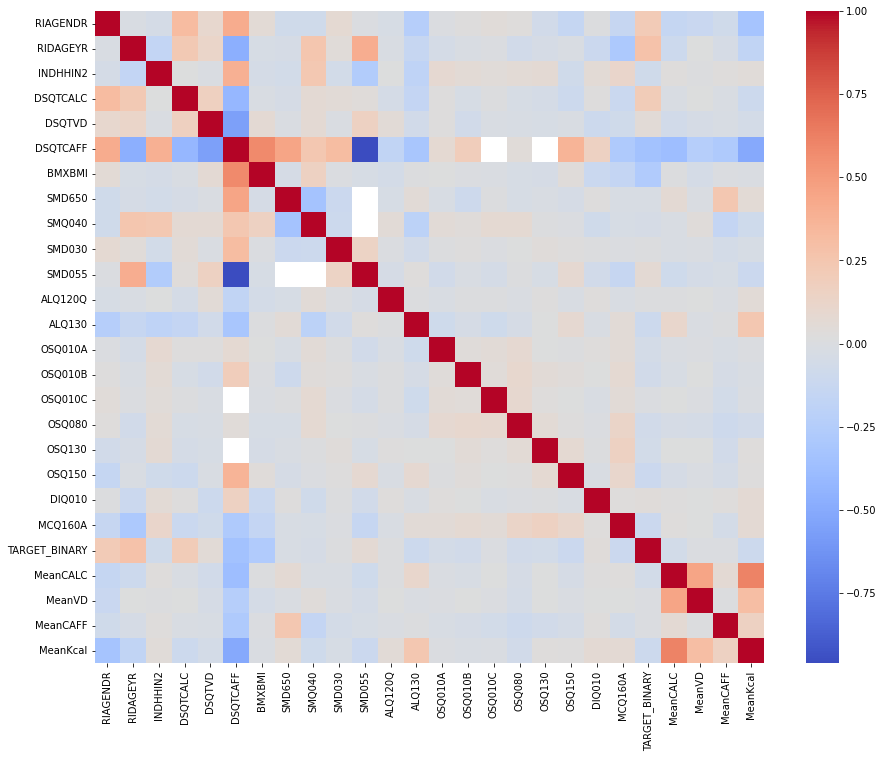

In [7]:
#Heatmap correlation
c=df.corr()
fig, ax = plt.subplots(figsize=(15,12))   
sns.heatmap(c,cmap='coolwarm', xticklabels=True, yticklabels=True, annot=False)
plt.show()

In [8]:
df.isna().sum()

RIAGENDR            0
RIDAGEYR            0
INDHHIN2          137
DSQTCALC         1712
DSQTVD           1720
DSQTCAFF         2886
BMXBMI             20
SMD650           2330
SMQ040           1537
SMD030           1541
SMD055           2168
ALQ120Q           574
ALQ130           1109
OSQ010A             0
OSQ010B             0
OSQ010C             2
OSQ080              2
OSQ130             10
OSQ150            153
DIQ010              1
MCQ160A             9
TARGET_BINARY       0
MeanCALC          220
MeanVD            220
MeanCAFF          220
MeanKcal          220
dtype: int64

In [9]:
df.nunique()

RIAGENDR            2
RIDAGEYR           40
INDHHIN2           14
DSQTCALC          360
DSQTVD            223
DSQTCAFF           11
BMXBMI            323
SMD650             23
SMQ040              3
SMD030             43
SMD055             60
ALQ120Q            36
ALQ130             14
OSQ010A             2
OSQ010B             2
OSQ010C             2
OSQ080              2
OSQ130              2
OSQ150              2
DIQ010              3
MCQ160A             2
TARGET_BINARY       2
MeanCALC         1739
MeanVD            644
MeanCAFF          841
MeanKcal         2103
dtype: int64

In [10]:
for col in df.columns:
    if df[col].nunique() < 10:
        print(f"Column: {col}")
        print("Number of unique values:", df[col].nunique())
        print("Unique values and their counts:")
        print(df[col].value_counts())
        print('-'*40)  # Just for better visual separation

Column: RIAGENDR
Number of unique values: 2
Unique values and their counts:
2.0    1461
1.0    1436
Name: RIAGENDR, dtype: int64
----------------------------------------
Column: SMQ040
Number of unique values: 3
Unique values and their counts:
3.0    788
1.0    486
2.0     86
Name: SMQ040, dtype: int64
----------------------------------------
Column: OSQ010A
Number of unique values: 2
Unique values and their counts:
2.0    2855
1.0      42
Name: OSQ010A, dtype: int64
----------------------------------------
Column: OSQ010B
Number of unique values: 2
Unique values and their counts:
2.0    2670
1.0     227
Name: OSQ010B, dtype: int64
----------------------------------------
Column: OSQ010C
Number of unique values: 2
Unique values and their counts:
2.0    2844
1.0      51
Name: OSQ010C, dtype: int64
----------------------------------------
Column: OSQ080
Number of unique values: 2
Unique values and their counts:
2.0    2213
1.0     682
Name: OSQ080, dtype: int64
--------------------------

In [11]:
def MissingValuesHandler(in_df, threshold_missing_perc, threshold_unique_values):
    print(f'Shape before cleaning: {in_df.shape}')

    # Set the threshold for the percentage of missing values (in %)
    threshold = threshold_missing_perc # 0 = 100% // 50 = 50% // 100 = 0%

    # Calculate the percentage of missing values for each feature
    missing_percentage = (in_df.isna().sum() / len(in_df)) * 100

    # Find features with missing values exceeding the missing percentage threshold
    features_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()
    out_df = in_df.drop(columns=features_to_drop)


    # Filling the missing values
    for column in out_df.columns:
        unique_count = out_df[column].nunique()

        if unique_count <= threshold_unique_values:
            mode_value = out_df[column].mode()[0]
            out_df[column].fillna(mode_value, inplace=True)
        else:
            median_value = out_df[column].median()
            out_df[column].fillna(median_value, inplace=True)

    print(f'Shape after cleaning: {out_df.shape}')
    print(f'Dropped features: {len(features_to_drop)}')
    print(f'Dropped features: {features_to_drop}')

    return out_df

In [12]:
# Removing every feature that has > 20% of missing values, and filling the missing values of a feature using the mode if that feature has equal or less than 30 unique values.
# If that feature has 30 plus unique values the mean is used to fill the missing values.
cleaned_df = MissingValuesHandler(in_df=df, threshold_missing_perc=20, threshold_unique_values=30)

Shape before cleaning: (2897, 26)
Shape after cleaning: (2897, 18)
Dropped features: 8
Dropped features: ['DSQTCALC', 'DSQTVD', 'DSQTCAFF', 'SMD650', 'SMQ040', 'SMD030', 'SMD055', 'ALQ130']


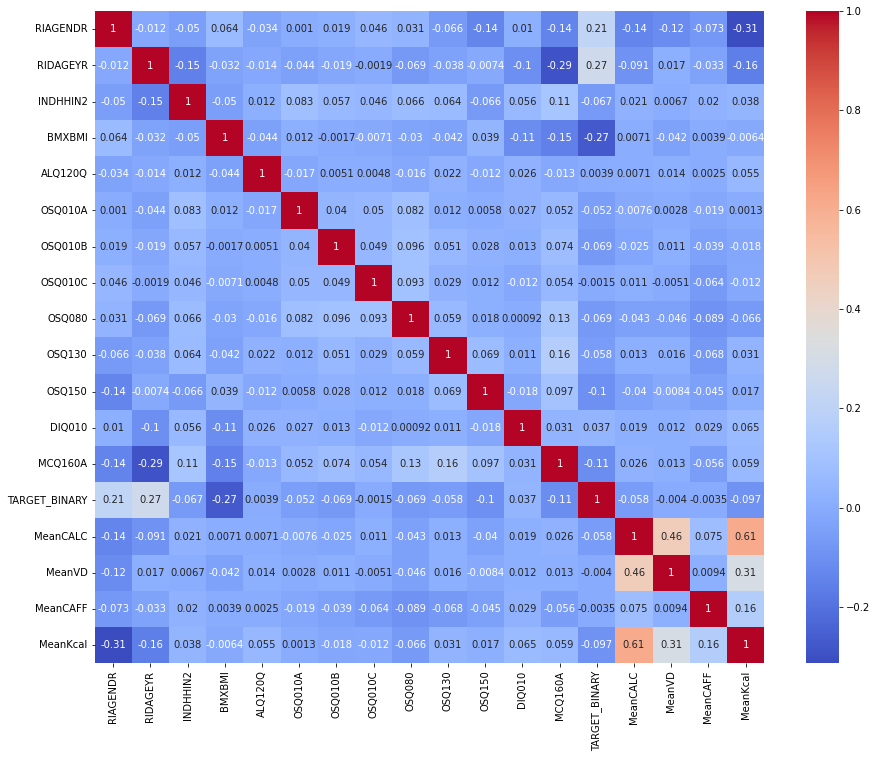

In [13]:
#Heatmap correlation
c=cleaned_df.corr()
fig, ax = plt.subplots(figsize=(15,12))   
sns.heatmap(c,cmap='coolwarm', xticklabels=True, yticklabels=True, annot=True)
plt.show()

In [14]:
cleaned_df.isna().sum()

RIAGENDR         0
RIDAGEYR         0
INDHHIN2         0
BMXBMI           0
ALQ120Q          0
OSQ010A          0
OSQ010B          0
OSQ010C          0
OSQ080           0
OSQ130           0
OSQ150           0
DIQ010           0
MCQ160A          0
TARGET_BINARY    0
MeanCALC         0
MeanVD           0
MeanCAFF         0
MeanKcal         0
dtype: int64

## Data Splitting

In [15]:
features = cleaned_df.drop(columns='TARGET_BINARY')
target = cleaned_df['TARGET_BINARY']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2027, 17)
(870, 17)
(2027,)
(870,)


## Scaling/Normalization

In [17]:
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(2027, 17)
(870, 17)


# Baseline Models

In [18]:
def metrics_score(actual, predicted):
    report = classification_report(actual, predicted, output_dict=True)
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Normal', 'Osteo'], yticklabels=['Normal', 'Osteo'], cmap="Greens")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return report

In [19]:
baseline_metrics_score_list = []

### Logistic Regression

              precision    recall  f1-score   support

         0.0       0.75      0.85      0.80       530
         1.0       0.70      0.55      0.62       340

    accuracy                           0.73       870
   macro avg       0.72      0.70      0.71       870
weighted avg       0.73      0.73      0.73       870



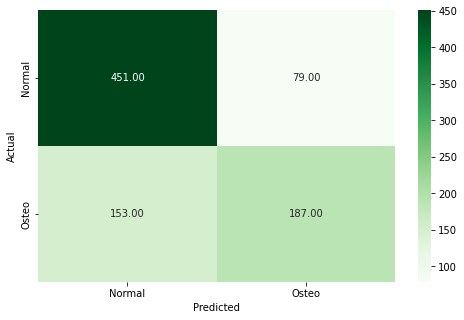

In [20]:
lr_classifier=LogisticRegression(random_state=42)

lr_classifier.fit(X=X_train_scaled,y=y_train)
lr_predictions = lr_classifier.predict(X_test_scaled)

baseline_metrics_score_list.append(metrics_score(y_test, lr_predictions))

### Random Forest

              precision    recall  f1-score   support

         0.0       0.72      0.83      0.77       530
         1.0       0.65      0.50      0.57       340

    accuracy                           0.70       870
   macro avg       0.69      0.66      0.67       870
weighted avg       0.69      0.70      0.69       870



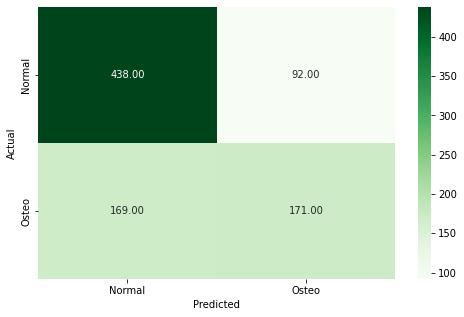

In [21]:
rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X=X_train_scaled, y=y_train)
rf_predictions = rf_classifier.predict(X_test_scaled)

baseline_metrics_score_list.append(metrics_score(y_test, rf_predictions))

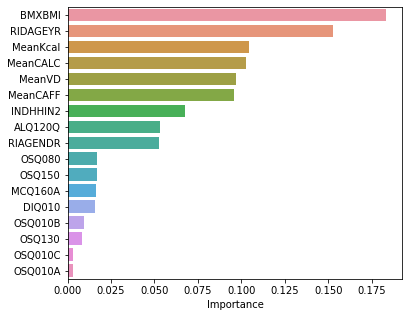

In [22]:
f_importances = rf_classifier.feature_importances_
columns = X_train_scaled.columns

f_importance_df = pd.DataFrame(f_importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6, 5))
sns.barplot(data=f_importance_df, x='Importance', y=f_importance_df.index)
plt.show()

### Decision Tree

              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71       530
         1.0       0.55      0.54      0.54       340

    accuracy                           0.64       870
   macro avg       0.63      0.63      0.63       870
weighted avg       0.64      0.64      0.64       870



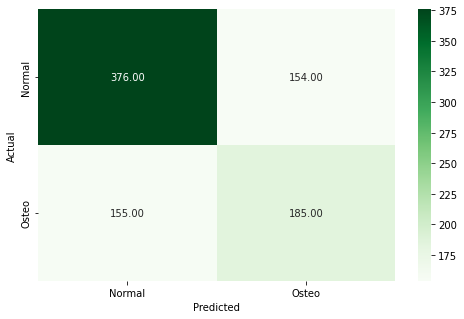

In [23]:
tree_classifier = DecisionTreeClassifier(random_state=42)

tree_classifier.fit(X=X_train_scaled, y=y_train)
tree_predictions = tree_classifier.predict(X_test_scaled)

baseline_metrics_score_list.append(metrics_score(y_test, tree_predictions))

### Support Vector Machine (SVM)

              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79       530
         1.0       0.70      0.46      0.56       340

    accuracy                           0.71       870
   macro avg       0.71      0.67      0.67       870
weighted avg       0.71      0.71      0.70       870



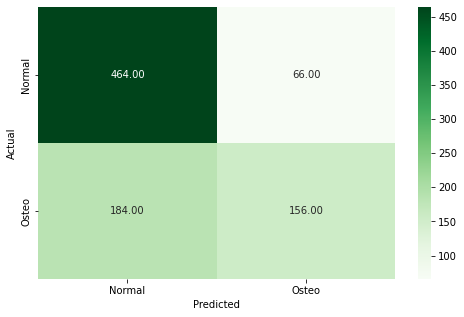

In [24]:
svm_classifier = SVC(random_state=42)

svm_classifier.fit(X=X_train_scaled, y=y_train)
svm_predictions = svm_classifier.predict(X_test_scaled)

baseline_metrics_score_list.append(metrics_score(y_test, svm_predictions))

### Naive Bayes

In [25]:
nb_classifier = GaussianNB(random_state=42)

nb_classifier.fit(X=X_train_scaled, y=y_train)
nb_predictions = nb_classifier.predict(X_test_scaled)

baseline_metrics_score_list.append(metrics_score(y_test, nb_predictions))

TypeError: __init__() got an unexpected keyword argument 'random_state'

### K-Nearest Neighbors (KNN)

              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74       530
         1.0       0.60      0.50      0.54       340

    accuracy                           0.67       870
   macro avg       0.65      0.64      0.64       870
weighted avg       0.67      0.67      0.67       870



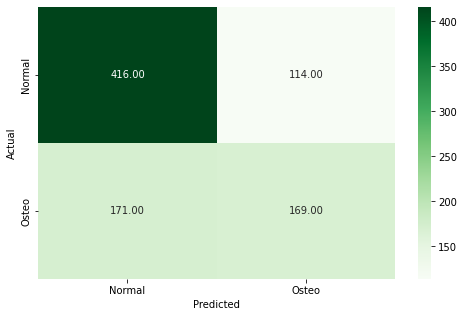

In [ ]:
knn_classifier = KNeighborsClassifier(random_state=42)

knn_classifier.fit(X=X_train_scaled, y=y_train)
knn_predictions = knn_classifier.predict(X_test_scaled)

baseline_metrics_score_list.append(metrics_score(y_test, knn_predictions))

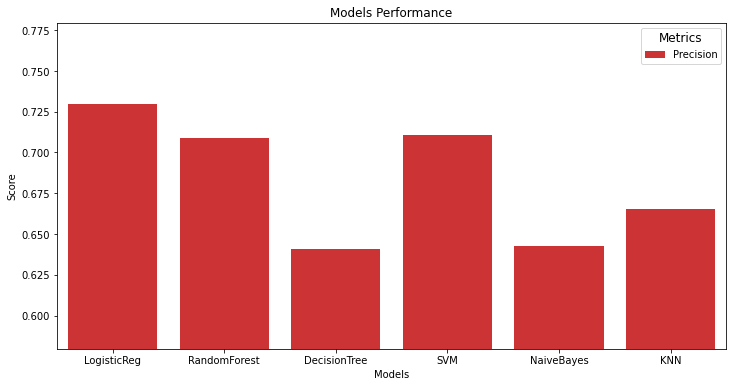

In [ ]:
precision_score_list = []
models_list = ['LogisticReg', 'RandomForest', 'DecisionTree', 'SVM', 'NaiveBayes', 'KNN']

for i in baseline_metrics_score_list:
    precision_score_list.append(i['weighted avg']['precision'])

# Create a DataFrame
data = {
    'Models': models_list,
    'Precision': precision_score_list,
}

df_plt = pd.DataFrame(data)

# Melt the DataFrame to reshape it into a "tidy" format
df_melted = pd.melt(df_plt, id_vars=['Models'], value_vars=['Precision'], var_name='Metrics', value_name='Score')

# Set up the figure
plt.figure(figsize=(12, 6))

# Create a grouped bar plot using seaborn
sns.barplot(x='Models', y='Score', hue='Metrics', data=df_melted, palette='Set1')

plt.title('Models Performance')
plt.ylim(0, 1.0)  # Set the y-axis limits for better visualization
plt.ylim(max(max(precision_score_list) - 0.15, 0), min(max(precision_score_list) + 0.05, 1))  # Set the y-axis limits for better visualization
plt.legend(title='Metrics', title_fontsize='12')
plt.show()
